# dataset 과 dataLoader
- Dataset : 샘플과 라벨을 저장
- DataLoader : dataset을 iterable 하게 감싸는 객체 

In [116]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


# img, 
training_data = datasets.FashionMNIST(
    root='data',  # 경로
    train=True, # 학습용 설정
    download=True, # 경로에 존재하지 않으면 다운로드
    transform=ToTensor()  #텐서로 변환
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)


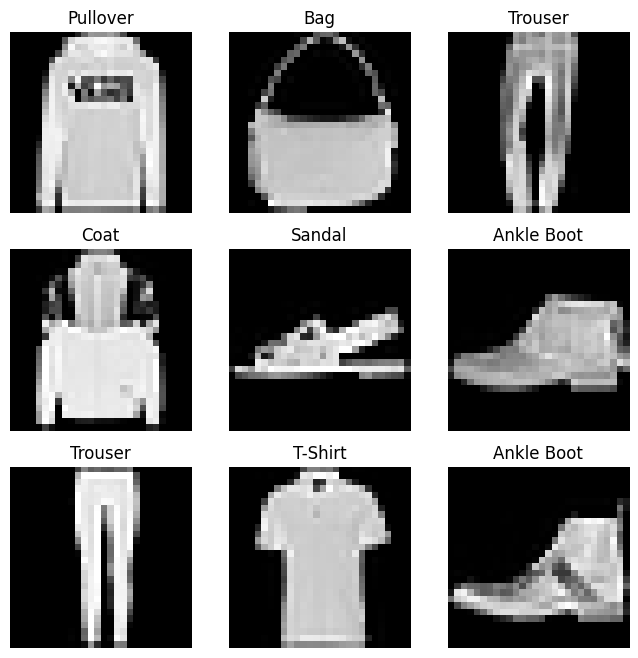

In [119]:
# 라벨을 명시
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))

for i in range(1, 10):
    #랜덤으로 숫자하나 뽑는다 굳이 torch로 해야하나 싶다
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(3, 3, i)
    plt.title(labels_map[label])
    plt.axis("off")  #축 지우기
    plt.imshow(img.squeeze(), cmap="gray") # 1인 차원 제거
plt.show()
    

# 사용자 데이터셋 만들기
- 사용자 데이터셋에서 __init__, __len__, and __getitem__. 반드시 구현해야함

In [120]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):  # Dataset 클래스를 상속받아서 함수를 오버라이딩한다
    #초기화 함수
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
         
    def __len__(self):    #길이 보기
        return len(self.img_labels)

    def __getitem__(self, idx):
        # idx이미지의 경로 생성
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)  # 경로의 이미지데이터를 가져와 텐서로 변환
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# DataLoader로 학습용 데이터 준비하기
- 간단한 api로 데이터셔플, 배치, 미니배치등 복잡한 과정을 추상화한 순회가능한 객체이다
- 미니배치 = 배치사이즈만큼 나눠진 데이터 그룹?

In [123]:
from torch.utils.data import DataLoader

# 데이터셋을 객체의 파라미터로 넣으면서, 배치사이즈와 셔플여부를 지정해준다
training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [136]:
next(iter(training_dataloader))[0].size()
# torch.Size([64, 1, 28, 28]), 64개의 데이터, 각 1개의 이미지는 28*28 크기
torch.randn(2,1,2,2)

tensor([[[[-0.4745,  0.3436],
          [ 1.5691, -0.8544]]],


        [[[-0.8600, -0.0303],
          [ 0.4561,  0.4120]]]])